## Setting up the Cell Parameters.

In [1]:
from AMS_BP.core.configio.configmodels import CellParameters

cellp = CellParameters(cell_type="RectangularCell",params = {"bounds":[4, 7, 3, 9,-0.5,0.5]})

print(cellp)

cell_type='RectangularCell' params={'bounds': [4, 7, 3, 9, -0.5, 0.5]}


Make a Rectangular_Cell

In [2]:
from AMS_BP.core.configio.convertconfig import make_cell

rcell = make_cell(cellp)
print(
    rcell
)

RectangularCell(mesh=PolyData (0x12e4589a0)
  N Cells:    12
  N Points:   8
  N Strips:   0
  X Bounds:   4.000e+00, 7.000e+00
  Y Bounds:   3.000e+00, 9.000e+00
  Z Bounds:   -5.000e-01, 5.000e-01
  N Arrays:   2, bounds=[4, 7, 3, 9, -0.5, 0.5])


## Make the Molecule Parameters.
```python
class MoleculeParameters(BaseModel)
```

#### Fields
- `num_molecules: List[int]`
  - Description: Number of molecules for each type

- `track_type: List[Literal["fbm", "constant"]]`
  - Description: Type of molecular motion
  - Valid values: "fbm" (fractional Brownian motion) or "constant"

- `diffusion_coefficient: List[List[float]]`
  - Description: Diffusion coefficients in μm²/s
  - 2D array automatically converted to numpy array

- `hurst_exponent: List[List[float]]`
  - Description: Hurst exponents for fractional Brownian motion
  - 2D array automatically converted to numpy array

- `allow_transition_probability: List[bool]`
  - Description: Whether to allow state transitions

- `transition_matrix_time_step: List[int]`
  - Description: Time step in milliseconds for transition matrices

- `diffusion_transition_matrix: List[List[List[float]]]`
  - Description: State transition probabilities for diffusion
  - 3D array automatically converted to numpy array

- `hurst_transition_matrix: List[List[List[float]]]`
  - Description: State transition probabilities for Hurst exponent
  - 3D array automatically converted to numpy array

- `state_probability_diffusion: List[List[float]]`
  - Description: Initial state probabilities for diffusion
  - 2D array automatically converted to numpy array

- `state_probability_hurst: List[List[float]]`
  - Description: Initial state probabilities for Hurst exponent
  - 2D array automatically converted to numpy array


> We want 2 type of molecule but 10000 of one and 10000 of the other. So num_molecules = [10000, 10000]. # size of the list = types of molecules, values = amount of that molecule.

In [3]:
from AMS_BP.core.configio.configmodels import MoleculeParameters

num_molecules = [10000, 10000]  # two type of molecules with 10000 of that molecule
track_type = [
    "constant",
    "constant",
]  # two type of molecule and all the molecules of this type are "constant" -> fixed or not moving. Can also be "fbm"
allow_transition_probability = [
    False,
    False,
]  # Can the molecules of this type change diffusion coefficients or hurst exponents?
# If false, then the diffusion coefficient and hurst exponent are fixed for the specific molecule. If true, then the diffusion coefficient and hurst exponent can change in time for that molecule.
diffusion_coefficient = [
    [
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
    ],
]  # since constant these don't matter. But this is same size as num_molecules. Inner lists are for each molecule type.
# each molecule can explore n D_coefficients (in this case 0,1,2,3). The distribution of coefficients in the populations is determined by the following parameters.
diffusion_track_amount = [
    [
        0.5,
        0.5,
    ],
    [
        0.5,
        0.5,
    ],
]  # must add to 1 for each molecule type. This is the initial distribution of diffusion coefficients in the population. The value of the diffusion coefficient is the same index in diffusion_coefficient.
hurst_exponent = [
    [
        0.5,
        0.5,
    ],
    [
        0.5,
        0.5,
    ],
]  # same as diffusion_coefficient.
hurst_track_amount = [
    [
        0.5,
        0.5,
    ],
    [
        0.5,
        0.5,
    ],
]  # same structure as diffusion_track_amount.

diffusion_transition_matrix = [
    [
        [
            0.992,
            0.008,
        ],
        [
            0.0273,
            0.9727,
        ],
    ],
    [
        [
            0.992,
            0.008,
        ],
        [
            0.0273,
            0.9727,
        ],
    ],
]  # transition matrix for diffusion coefficients. For a particular molecule type, the probability of transitioning from one diffusion coefficient to another is given by the transition matrix. The size of the matrix is the number of diffusion coefficients for that molecule type. The rows are the current diffusion coefficient and the columns are the new diffusion coefficient.
hurst_transition_matrix = [
    [
        [
            0.992,
            0.008,
        ],
        [
            0.0273,
            0.9727,
        ],
    ],
    [
        [
            0.992,
            0.008,
        ],
        [
            0.0273,
            0.9727,
        ],
    ],
]  # same as diffusion_transition_matrix but  for hurst exponents.
transition_matrix_time_step = [
    20,
    20,
]  # the time step at which the probabilities for the transition matrices are defined. In units of milliseconds.


In [4]:
# combine it into one data structure
molecule_parameters = MoleculeParameters(
    num_molecules=num_molecules,
    track_type=track_type,
    diffusion_coefficient=diffusion_coefficient,
    state_probability_diffusion=diffusion_track_amount,
    hurst_exponent=hurst_exponent,
    state_probability_hurst=hurst_track_amount,
    allow_transition_probability=allow_transition_probability,
    transition_matrix_time_step=transition_matrix_time_step,
    diffusion_transition_matrix=diffusion_transition_matrix,
    hurst_transition_matrix=hurst_transition_matrix,
)
print(molecule_parameters)

num_molecules=[10000, 10000] track_type=['constant', 'constant'] diffusion_coefficient=[[0.0, 0.0], [0.0, 0.0]] hurst_exponent=[[0.5, 0.5], [0.5, 0.5]] allow_transition_probability=[False, False] transition_matrix_time_step=[20, 20] diffusion_transition_matrix=[[[0.992, 0.008], [0.0273, 0.9727]], [[0.992, 0.008], [0.0273, 0.9727]]] hurst_transition_matrix=[[[0.992, 0.008], [0.0273, 0.9727]], [[0.992, 0.008], [0.0273, 0.9727]]] state_probability_diffusion=[[0.5, 0.5], [0.5, 0.5]] state_probability_hurst=[[0.5, 0.5], [0.5, 0.5]]


## GlobalParameters
Defines global simulation parameters.

```python
class GlobalParameters(BaseModel)
```

#### Fields
- `sample_plane_dim: List[float]`
  - Description: Sample plane dimensions in micrometers
  - Automatically converted to numpy array

- `cycle_count: int`
  - Description: Number of simulation cycles

- `exposure_time: int`
  - Description: Exposure time in milliseconds

- `interval_time: int`
  - Description: Interval time in milliseconds

- `oversample_motion_time: int`
  - Description: Oversample motion time in milliseconds


In [5]:
sample_plane_dim = [
    10,
    10,
]  # in um. Describes the size of the plane on which the sample is placed.
cycle_count = 100  # Number of cycles to run the simulation for. (this would be the # of frames in a movies if a time series)
# cycle_count is 1 for each exposure_time + interval_time in the simulation.
exposure_time = 20  # in ms
interval_time = 0  # in ms
oversample_motion_time = 10  # this is the smallest time step in the simulation for the motion of the molecules. Both the exposure_time and interval_time need to be equal to or larger than this, or be 0.

from AMS_BP.core.configio.convertconfig import GlobalParameters

globalp = GlobalParameters(
    sample_plane_dim=sample_plane_dim,
    cycle_count=cycle_count,
    exposure_time=exposure_time,
    interval_time=interval_time,
    oversample_motion_time=oversample_motion_time,
)
print(globalp)

sample_plane_dim=array([10., 10.]) cycle_count=100 exposure_time=20 interval_time=0 oversample_motion_time=10


## CondensateParameters
Defines parameters for molecular condensate simulation.

```python
class CondensateParameters(BaseModel)
```

#### Fields
First dimension represents the types of molecules. (similar to the MoleculeParameters)
- `initial_centers: List[List[List[float]]]`
  - Description: Initial centers in micrometers
  - 2D array automatically converted to numpy array

- `initial_scale: List[List[float]]`
  - Description: Initial scale in micrometers
  - Automatically converted to numpy array

- `diffusion_coefficient: List[List[float]]`
  - Description: Diffusion coefficients in μm²/s
  - Automatically converted to numpy array

- `hurst_exponent: List[List[float]]`
  - Description: Hurst exponents for motion
  - Automatically converted to numpy array

- `density_dif: List[int]`
  - Description: Density difference parameter


In [6]:
initial_centers = [
    [
        [
            5.5,
            5,
            0.05,
        ],
        [
            5,
            5,
            -0.15,
        ],
        [
            5,
            6,
            -0.15,
        ],
        [
            5,
            5.5,
            -0.15,
        ],
        [
            6,
            5.5,
            -0.15,
        ],
    ],
    [
        [
            5.5,
            5,
            0.05,
        ],
        [
            5,
            7,
            -0.15,
        ],
    ],
] # first dimension is the types of molecules. (see num_molecules) For each type there can be any number of condensates with centers [x,y,z]
initial_scale = [[0.26, 0.26, 0.13, 0.13, 0.26], [0.26, 0.26]] # um
diffusion_coefficient = [[0, 0, 0, 0, 0], [0, 0]] # um^2/s
hurst_exponent = [[0.2, 0.2, 0.2, 0.2, 0.2], [0.2, 0.2]]
density_dif = [10, 10] # density of the condensate vs the background.

from AMS_BP.core.configio.convertconfig import CondensateParameters
condp = CondensateParameters(
    initial_centers=initial_centers,
    initial_scale=initial_scale,
    diffusion_coefficient=diffusion_coefficient,
    hurst_exponent=hurst_exponent,
    density_dif=density_dif,
)
print(condp)

initial_centers=[[[5.5, 5.0, 0.05], [5.0, 5.0, -0.15], [5.0, 6.0, -0.15], [5.0, 5.5, -0.15], [6.0, 5.5, -0.15]], [[5.5, 5.0, 0.05], [5.0, 7.0, -0.15]]] initial_scale=[[0.26, 0.26, 0.13, 0.13, 0.26], [0.26, 0.26]] diffusion_coefficient=[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0]] hurst_exponent=[[0.2, 0.2, 0.2, 0.2, 0.2], [0.2, 0.2]] density_dif=[10, 10]


## OutputParameters
Defines parameters for simulation output.

```python
class OutputParameters(BaseModel)
```

#### Fields
- `output_path: str`
  - Description: Path for output files

- `output_name: str`
  - Description: Base name for output files

- `subsegment_type: str`
  - Description: Type of subsegmentation

- `subsegment_number: int`
  - Description: Number of subsegments


In [7]:
from AMS_BP.core.configio.convertconfig import OutputParameters
outp = OutputParameters(
    output_path = "blah/blahblah",
    output_name = "datamoviename",
    subsegment_type = "any_string",
    subsegment_number = 1, # any integer
)

Combine all into the base config class.

In [8]:
from AMS_BP.core.configio.convertconfig import ConfigList
config_list = ConfigList(
    CellParameter = cellp,
    MoleculeParameter = molecule_parameters,
    GlobalParameter = globalp,
    CondensateParameter = condp,
    OutputParameter = outp,
)

## Create fluorophore objects!

> We stated there are two types of fluorophores before. Now we define what they are.

Let one be [PAmCherry](https://www.fpbase.org/protein/pamcherry1/), and the other be [EGFP](https://www.fpbase.org/protein/egfp/). I will use parameter estimates from FPbase in the following. You can of course also make up your own custom fluorophore with any property values you like.

In [9]:
num_of_fluorophores = 2
fluorophore_names = ["mCherry", "EGFP"]


In [10]:
from AMS_BP.core.sample.flurophores.flurophore_schema import Fluorophore, State, StateTransition, SpectralData
# mCherry
pamcherry_f = {
    "name" : 'mCherry',
    "initial_state" : "bright", # must be one of the defined states below.
}
bright_state = State(
            name = "bright",
            state_type = "fluorescent", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = 0.22, # unitless; 0-1
            extinction_coefficient_lambda_val = 72000, # in M^-1 cm^-1
            fluorescent_lifetime = 0.0000000014, # in seconds
            excitation_spectrum = SpectralData(
                    wavelengths = [310.0, 311.0, 411.0, 511.0, 586, 626], # in nm
                    intensities = [0.06, 0.06, 0.01, 0.19, 1.00, 0.02], # in arbitrary units
                ),
            emission_spectrum = SpectralData(
                    wavelengths = [555.0, 600.0, 611.0, 634.0, 670.0, 774.0], # in nm
                    intensities = [0.00, 0.84, 1.00, 0.63, 0.35, 0.04], # in arbitrary units
                ),
            )
triplet_state = State(
            name = "triplet",
            state_type = "dark", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
bleached_state = State(
            name = "bleached",
            state_type = "bleached", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
transition_BtB = StateTransition(
    from_state = "bright",
    to_state = "bleached",
    photon_dependent = True,
    spectrum = SpectralData(
                    wavelengths = [310.0, 311.0, 411.0, 511.0, 586, 626], # in nm
                    intensities = [0.06, 0.06, 0.01, 0.19, 1.00, 0.02], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 72000,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,
    )

transition_BtT = StateTransition(
    from_state = "bright",
    to_state = "triplet",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transition_TtB = StateTransition(
    from_state = "triplet",
    to_state = "bright",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transition_TtBl = StateTransition(
    from_state = "triplet",
    to_state = "bleached",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transitions = {
    "bright_bleached" : transition_BtB,
    "bright_triplet" : transition_BtT,
    "triplet_bright" : transition_TtB,
    "triplet_bleached" : transition_TtBl,
}
# fluorophore definition
fmcherry = Fluorophore(
    name = pamcherry_f['name'],
    initial_state = bright_state,
    states = {
        "bright" : bright_state,
        "triplet" : triplet_state,
        "bleached" : bleached_state,
        },
    transitions = transitions,
    )
print(fmcherry)

name='mCherry' states={'bright': State(name='bright', state_type=<StateType.FLUORESCENT: 'fluorescent'>, excitation_spectrum=SpectralData(wavelengths=[310.0, 311.0, 411.0, 511.0, 586.0, 626.0], values=[0.06, 0.06, 0.01, 0.19, 1.0, 0.02], cache_values={310.0: 0.06, 311.0: 0.06, 411.0: 0.01, 511.0: 0.19, 586.0: 1.0, 626.0: 0.02}), emission_spectrum=SpectralData(wavelengths=[555.0, 600.0, 611.0, 634.0, 670.0, 774.0], values=[0.0, 0.84, 1.0, 0.63, 0.35, 0.04], cache_values={555.0: 0.0, 600.0: 0.84, 611.0: 1.0, 634.0: 0.63, 670.0: 0.35, 774.0: 0.04}), quantum_yield_lambda_val=0.22, quantum_yield=WavelengthDependentProperty(wavelengths=[555.0, 600.0, 611.0, 634.0, 670.0, 774.0], values=[0.0, 0.1848, 0.22, 0.1386, 0.077, 0.0088], cache_values={555.0: 0.0, 600.0: 0.1848, 611.0: 0.22, 634.0: 0.1386, 670.0: 0.077, 774.0: 0.0088}), extinction_coefficient_lambda_val=72000.0, extinction_coefficient=WavelengthDependentProperty(wavelengths=[310.0, 311.0, 411.0, 511.0, 586.0, 626.0], values=[4320.0, 4

In [11]:
# egfp
egfp_f = {
    "name" : 'EGFP',
    "initial_state" : "bright", # must be one of the defined states below.
}
bright_state = State(
            name = "bright",
            state_type = "fluorescent", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = 0.6, # unitless; 0-1
            extinction_coefficient_lambda_val = 55900, # in M^-1 cm^-1
            fluorescent_lifetime = 0.0000000026, # in seconds
            excitation_spectrum = SpectralData(
                    wavelengths = [300.0, 337.0, 488.0, 501.0, 522.0, 540.0], # in nm
                    intensities =  [0.1, 0.03, 1.00, 0.69, 0.03, 0.00], # in arbitrary units
                ),
            emission_spectrum = SpectralData(
                    wavelengths = [463.0, 494.0, 503.0, 510.0, 528.0, 549.0, 700.0], # in nm
                    intensities = [0.00, 0.33, 0.82, 1.00, 0.51, 0.30, 0.00], # in arbitrary units
                ),
            )
triplet_state = State(
            name = "triplet",
            state_type = "dark", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
bleached_state = State(
            name = "bleached",
            state_type = "bleached", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )

transition_BtB = StateTransition(
    from_state = "bright",
    to_state = "bleached",
    photon_dependent = True,
    spectrum = SpectralData(
                    wavelengths = [300.0, 337.0, 488.0, 501.0, 522.0, 540.0], # in nm
                    intensities =  [0.1, 0.03, 1.00, 0.69, 0.03, 0.00], # in arbitrary units
                ),
    extinction_coefficient_lambda_val = 55900 ,                                   # M^-1 cm^-1
    quantum_yield = 0.0000025,
    )

transition_BtT = StateTransition(
    from_state = "bright",
    to_state = "triplet",
    photon_dependent = True,
    spectrum = SpectralData(
                    wavelengths = [300.0, 337.0, 488.0, 501.0, 522.0, 540.0], # in nm
                    intensities =  [0.1, 0.03, 1.00, 0.69, 0.03, 0.00], # in arbitrary units
                ),
    extinction_coefficient_lambda_val = 55900 ,                                   # M^-1 cm^-1
    quantum_yield = 0.0000025,
    )
transition_TtB = StateTransition(
    from_state = "triplet",
    to_state = "bright",
    base_rate = 1, #1/s
    photon_dependent = False,
    spectrum = None,
    extinction_coefficient_lambda_val = None,
    quantum_yield = None,
    )
transition_TtBl = StateTransition(
    from_state = "triplet",
    to_state = "bleached",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )

transitions = {
    "bright_bleached" : transition_BtB,
    "bright_triplet" : transition_BtT,
    "triplet_bright" : transition_TtB,
    "triplet_bleached" : transition_TtBl,
}
# fluorophore definition
fegfp = Fluorophore(
    name = egfp_f['name'],
    initial_state = bright_state,
    states = {
        "bright" : bright_state,
        "triplet" : triplet_state,
        "bleached" : bleached_state,
        },
    transitions = transitions,
    )
print(fegfp)

name='EGFP' states={'bright': State(name='bright', state_type=<StateType.FLUORESCENT: 'fluorescent'>, excitation_spectrum=SpectralData(wavelengths=[300.0, 337.0, 488.0, 501.0, 522.0, 540.0], values=[0.1, 0.03, 1.0, 0.69, 0.03, 0.0], cache_values={300.0: 0.1, 337.0: 0.03, 488.0: 1.0, 501.0: 0.69, 522.0: 0.03, 540.0: 0.0}), emission_spectrum=SpectralData(wavelengths=[463.0, 494.0, 503.0, 510.0, 528.0, 549.0, 700.0], values=[0.0, 0.33, 0.82, 1.0, 0.51, 0.3, 0.0], cache_values={463.0: 0.0, 494.0: 0.33, 503.0: 0.82, 510.0: 1.0, 528.0: 0.51, 549.0: 0.3, 700.0: 0.0}), quantum_yield_lambda_val=0.6, quantum_yield=WavelengthDependentProperty(wavelengths=[463.0, 494.0, 503.0, 510.0, 528.0, 549.0, 700.0], values=[0.0, 0.198, 0.49199999999999994, 0.6, 0.306, 0.18, 0.0], cache_values={463.0: 0.0, 494.0: 0.198, 503.0: 0.49199999999999994, 510.0: 0.6, 528.0: 0.306, 549.0: 0.18, 700.0: 0.0}), extinction_coefficient_lambda_val=55900.0, extinction_coefficient=WavelengthDependentProperty(wavelengths=[300.

## Defining the Camera 

In [12]:
# Quantum efficiency curve (wavelength in nm : efficiency 0-1)
# extrapotation for wavelengths not included uses edge values
quantum_efficiency = [
    [
        399,
        0.00,
    ],
    [
        400,
        0.80,
    ],
    [
        500,
        0.90,
    ],
    [
        600,
        0.95,
    ],
    [
        700,
        0.90,
    ],
    [
        800,
        0.70,
    ],
    [
        900,
        0.40,
    ],
    [
        901,
        0.00,
    ],
]
wavelength_qe = {pair[0]: pair[1] for pair in quantum_efficiency}


from AMS_BP.core.optics.camera.quantum_eff import QuantumEfficiency
quantum_efficiency = QuantumEfficiency(wavelength_qe=wavelength_qe)
print(quantum_efficiency)

QuantumEfficiency(wavelength_qe={399: 0.0, 400: 0.8, 500: 0.9, 600: 0.95, 700: 0.9, 800: 0.7, 900: 0.4, 901: 0.0}, _cached_wavelength_qe={399: 0.0, 400: 0.8, 500: 0.9, 600: 0.95, 700: 0.9, 800: 0.7, 900: 0.4, 901: 0.0})


In [13]:
from AMS_BP.core.optics.camera.detectors import CMOSDetector
pixel_count = [190, 190]  # [width, height], 1200x1200 (x pixel_size)
pixel_detector_size = 6.5 # um
magnification = 100
dark_current = 0.0005     # electrons/pixel/second
readout_noise = 1.6       # electrons RMS
bit_depth = 16
sensitivity = 1.0         # electrons/ADU
base_adu = 100            #ADU
binning_size = 1          # 1x1 , if 2 then 2x2
detector = CMOSDetector(
    pixel_count=pixel_count,
    pixel_detector_size=pixel_detector_size,
    magnification=magnification,
    dark_current=dark_current,
    readout_noise=readout_noise,
    bit_depth=bit_depth,
    sensitivity=sensitivity,
    base_adu=base_adu,
    binning_size=binning_size,
    pixel_size = pixel_detector_size/magnification,
)
print(detector)

## Making the PSF Generator 

In [14]:
from AMS_BP.core.optics.psf.psf_engine import PSFEngine, PSFParameters
from typing import Optional

params_config = {
    "numerical_aperture": 1.4,
    "refractive_index": 1.0,
    #"pinhole_diameter": 0.4, # do not include is no pinhole. # in Airy Units
}


def make_psf(params_config: dict, pixel_size: int | float) -> PSFEngine:
    def Partial_PSFengine(
                wavelength: int | float, z_step: Optional[int | float] = None
            ):
                # Create PSFParameters instance
                parameters = PSFParameters(
                    emission_wavelength=wavelength,
                    numerical_aperture=float(params_config["numerical_aperture"]),
                    pixel_size=pixel_size,
                    z_step=float(params_config["z_step"]) if z_step is None else z_step,
                    refractive_index=float(params_config.get("refractive_index", 1.0)),
                    pinhole_diameter=params_config.get("pinhole_diameter", None),
                )

                # Create PSF engine
                psf_engine = PSFEngine(parameters)
                return psf_engine
    return Partial_PSFengine
psf_generator = make_psf(params_config, pixel_size=(pixel_detector_size/magnification))
print(psf_generator)


<function make_psf.<locals>.Partial_PSFengine at 0x12e469800>


## Define active light sources

In [15]:
from AMS_BP.core.optics.lasers.laser_profiles import LaserParameters, WidefieldBeam, GaussianBeam

# two lasers, 405 and 600 nm both widefield
laser_params_600 = LaserParameters(
    power = 50000,           # Power in watts 
    wavelength = 600,         # Wavelength in nanometers
    beam_width = 5.0,         # 1/e² beam width at waist in microns
    numerical_aperture = 1.4, # NA of focusing lens
    refractive_index = 1.518,
)

laser_params_488 = LaserParameters(
    power = 5,
    wavelength = 488,
    beam_width = 5.0,
    numerical_aperture = 1.4,
    refractive_index = 1.518,
)
wide600 = WidefieldBeam(laser_params_600)
wide488 = WidefieldBeam(laser_params_488)
print(wide600, wide488)
lasers = {"blue": wide488, "red": wide600}

<AMS_BP.core.optics.lasers.laser_profiles.WidefieldBeam object at 0x12e472750> <AMS_BP.core.optics.lasers.laser_profiles.WidefieldBeam object at 0x12e4727b0>


In [16]:
wide488.params.position = (5,5,0)
print(wide488.params.power)
wide488.calculate_intensity(5,5,-1,0)

5


np.float64(0.07484582756842625)

## Define Channels and Filter Sets

In [17]:
from AMS_BP.core.optics.filters.channels.channelschema import Channels
from AMS_BP.core.optics.filters.filters import create_allow_all_filter, create_bandpass_filter, FilterSet

In [18]:
c1filterset = FilterSet(
    name = "c1",
    excitation = create_allow_all_filter(points = 1000),
    dichroic = create_allow_all_filter(points = 1000),
    emission = create_bandpass_filter(
        center_wavelength = 600.0,
        bandwidth = 35,
        transmission_peak = 0.95,
        points = 1000,
    ),
)
c2filterset = FilterSet(
    name = "c2",
    excitation = create_allow_all_filter(points = 1000),
    dichroic = create_allow_all_filter(points = 1000),
    emission = create_bandpass_filter(
        center_wavelength = 500.0,
        bandwidth = 35,
        transmission_peak = 0.95,
        points = 1000,
    ),
)
channels = Channels(
    filtersets = [c1filterset, c2filterset],
    num_channels = 2,
    splitting_efficiency = [1, 1],
    names = ["c1", "c2"],
)

## Make the sample plane

In [19]:
from AMS_BP.core.configio.convertconfig import make_sample, make_condensatedict, make_samplingfunction, gen_initial_positions, create_track_generator, get_tracks, add_tracks_to_sample

In [20]:
# make initial sample plane
sample_plane = make_sample(
    global_params=config_list.GlobalParameter,
    cell=rcell,
)

# make condensates_dict
condensates_dict = make_condensatedict(
    condensate_params=config_list.CondensateParameter, cell=rcell
)

# make sampling function
sampling_functions = make_samplingfunction(
    condensate_params=config_list.CondensateParameter, cell=rcell
)

# create initial positions
initial_molecule_positions = gen_initial_positions(
    molecule_params=config_list.MoleculeParameter,
    cell=rcell,
    condensate_params=config_list.CondensateParameter,
    sampling_functions=sampling_functions,
)

# create the track generator
track_generators = create_track_generator(
    global_params=config_list.GlobalParameter, cell=rcell
)

# get all the tracks
tracks, points_per_time = get_tracks(
    molecule_params=config_list.MoleculeParameter,
    global_params=config_list.GlobalParameter,
    initial_positions=initial_molecule_positions,
    track_generator=track_generators,
)

# add tracks to sample
sample_plane = add_tracks_to_sample(
    tracks=tracks, sample_plane=sample_plane, fluorophore= [fmcherry, fegfp]
)


## Make the Virtual Microscope

In [21]:
from AMS_BP.core.sim_microscopy import VirtualMicroscope

vm = VirtualMicroscope(
    camera = (detector, quantum_efficiency),
    sample_plane = sample_plane,
    lasers = lasers,
    channels = channels,
    psf = psf_generator,
    config = config_list,
)

In [22]:
# reset
vm.reset_to_initial_config()

True

In [23]:
import numpy as np
import matplotlib.pyplot as plt

## Now lets do a Z-stack using the reset microscope

> Will do a Z-stack for 100 ms exposures with no interval time each

In [24]:
# define the z values of the stack, in units of u
z_vals = [-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75]

In [25]:
z_frames = []
for i in z_vals:
    frames, metadata = vm.run_sim(
        z_val=i,
        laser_power={"red": 0.0135, "blue": 0.012},
        laser_position={"red": (5,5,0), "blue": (5,5,0)},
        xyoffset=[0,0],
        duration_total=100,
        exposure_time=100,
        interval_time=0,
        scanning=False,
    )
    z_frames.append(frames)
z_frames = np.array(z_frames)
# this is in the format ZCTYX -> z-value, channel, time, y, x

> I want to emphasize that this is in the format ZCTYX -> z-value, channel, time, y, x
> In time series with no Z, it is in format CTYX.

In [26]:
from journalplots import set_style
from matplotlib_scalebar.scalebar import ScaleBar
set_style(font_scale=1)

In [27]:
from tifffile import TiffWriter
with TiffWriter(
    "widefield_twocolor_v1_mCherry_EGFP_high.ome.tiff", bigtiff=True
) as f:
    f.write(
        z_frames,
        metadata={"axes": "ZCTYX"},
    )

In [28]:
from tifffile import imread
z_frames = imread("widefield_twocolor_v1_mCherry_EGFP_high.ome.tiff")
print(z_frames.shape)

(7, 2, 190, 190)


In [29]:
max_max_c1 = np.max(z_frames[:,0, 41:-44, 55:-75])
max_max_c2 = np.max(z_frames[:,1, 41:-44, 55:-75])
max_lims = [max_max_c1, max_max_c2]

/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_89738/3070136307.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(np.array(np.linspace(0, max_max_c1, 6),dtype=int))
/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_89738/3070136307.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(np.array(np.linspace(0, max_max_c2, 6),dtype=int))


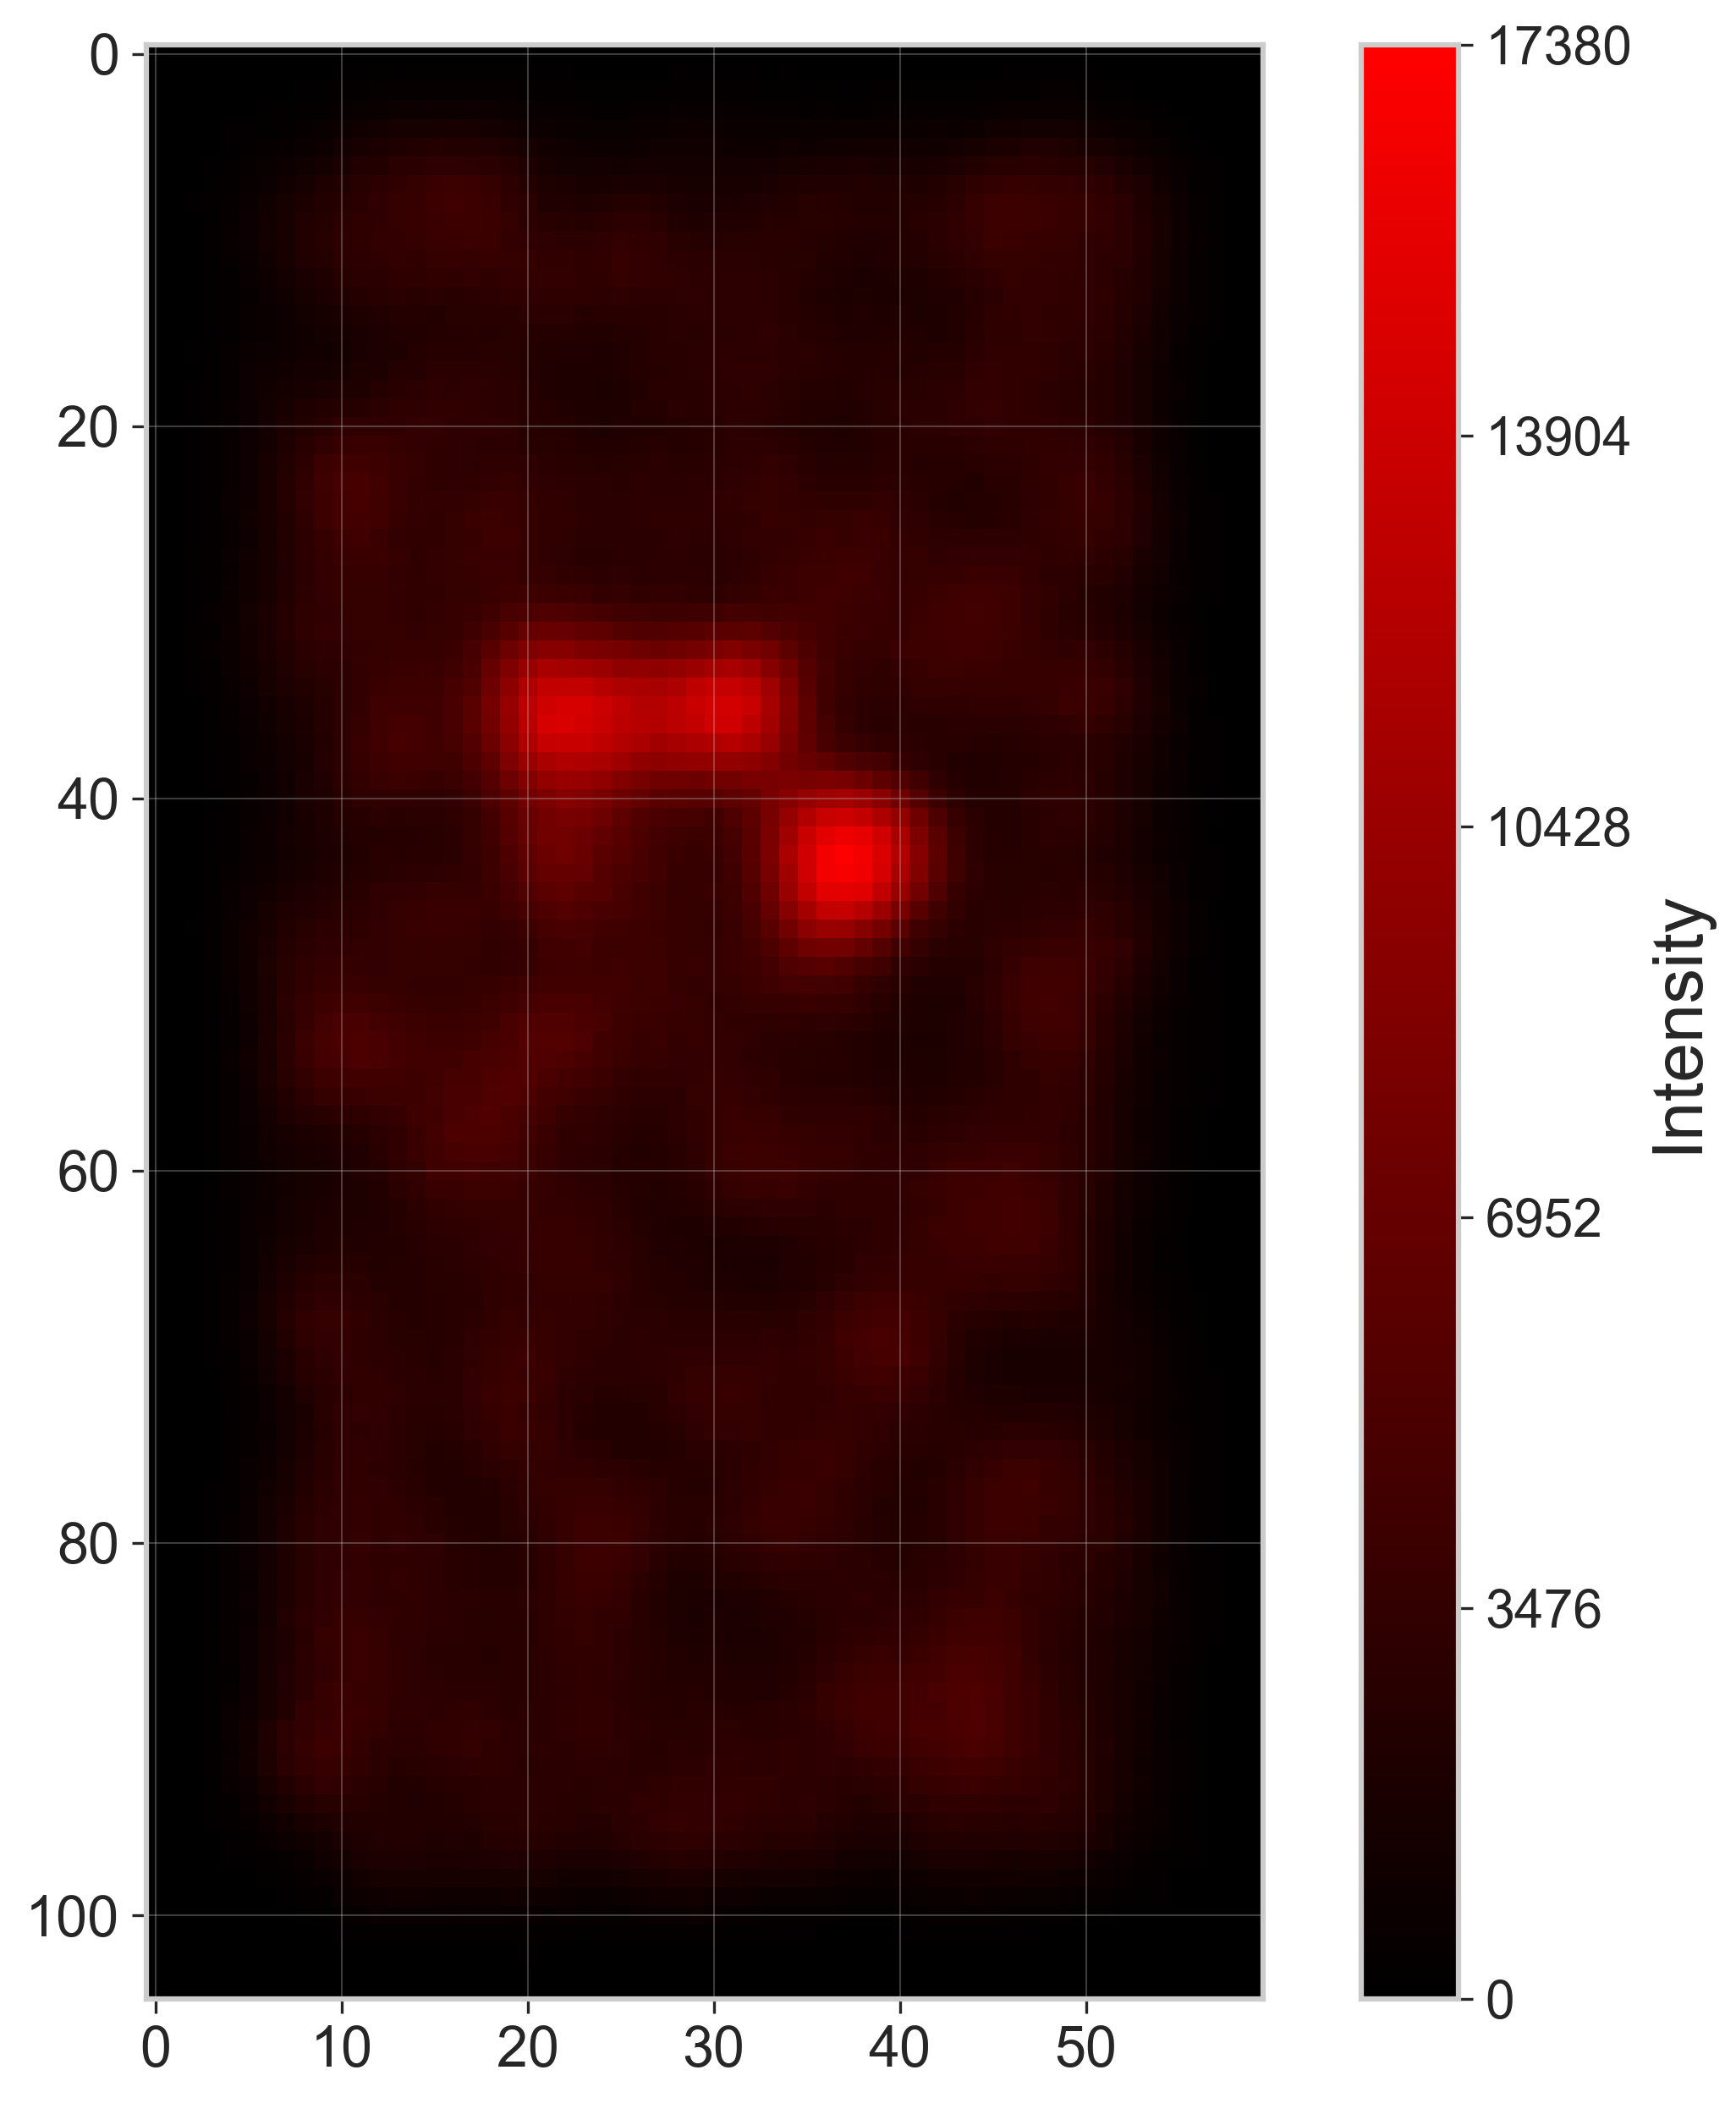

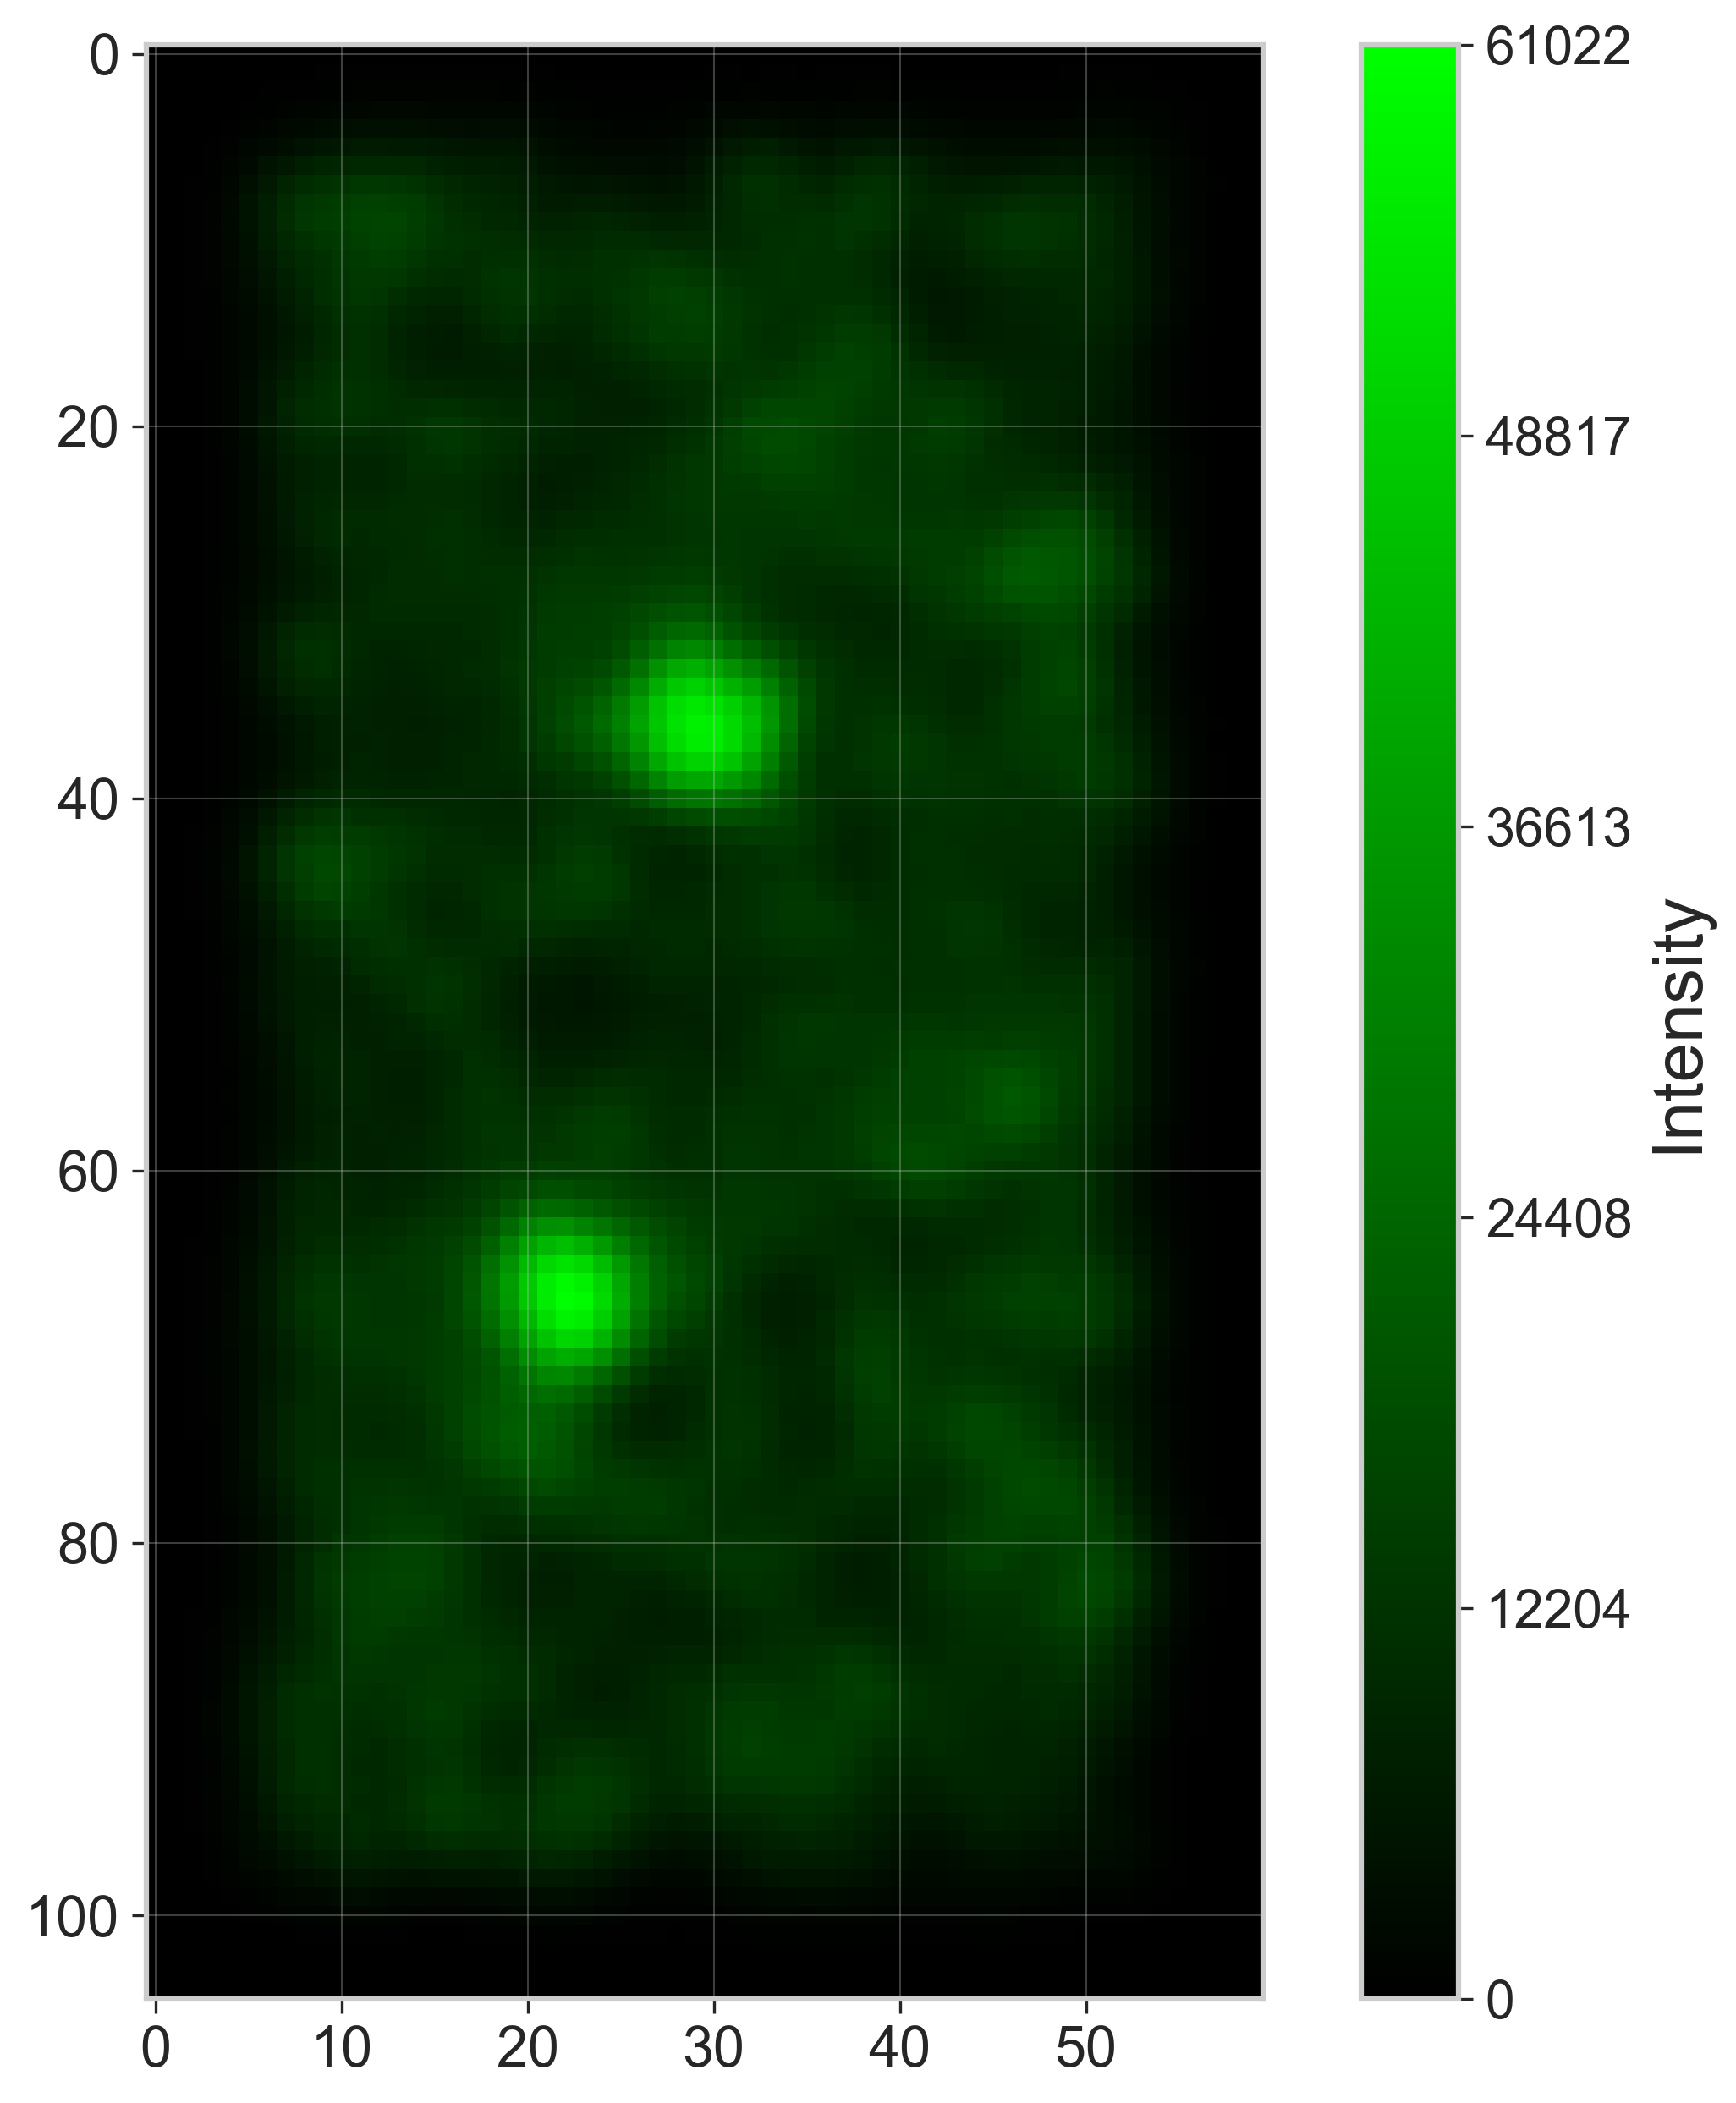

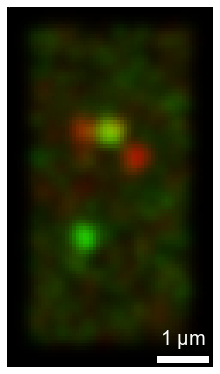

In [30]:
from microfilm.microplot import microshow
from microfilm import colorify

im_green, cmap, min_max = colorify.colorify_by_name(
    z_frames[3,0, 41:-44, 55:-75], cmap_name='red', flip_map=False, limits=[100,max_max_c1])
fig, ax = plt.subplots(1,1, figsize=(10,10))
a = ax.imshow(im_green, cmap=cmap)
#colorbar
cbar = fig.colorbar(a, ax=ax)
cbar.set_label('Intensity', fontsize=20)
cbar.ax.tick_params(labelsize=15)
#cbar.set_ticks(np.linspace(0, max_max_c2, 5))
cbar.ax.set_yticklabels(np.array(np.linspace(0, max_max_c1, 6),dtype=int))
#plt.savefig("high_colorbar_red_widefield.svg", dpi=600)

im_green, cmap, min_max = colorify.colorify_by_name(
    z_frames[3,1, 41:-44, 55:-75], cmap_name='green', flip_map=False, limits=[100,max_max_c2])
fig, ax = plt.subplots(1,1, figsize=(10,10))
a = ax.imshow(im_green, cmap=cmap)
#colorbar
cbar = fig.colorbar(a, ax=ax)
cbar.set_label('Intensity', fontsize=20)
cbar.ax.tick_params(labelsize=15)
#cbar.set_ticks(np.linspace(0, max_max_c2, 5))
cbar.ax.set_yticklabels(np.array(np.linspace(0, max_max_c2, 6),dtype=int))
#plt.savefig("high_colorbar_green_widefield.svg", dpi=600)

plt.show()
microim = microshow(
    images=z_frames[3,:, 41:-44, 55:-75], fig_scaling=5,
    cmaps=['pure_red', 'pure_green'],
    unit='um', scalebar_size_in_units=1, scalebar_unit_per_pix=0.065, scalebar_font_size=20,
    label_text='A', label_font_size=0.04, limits = [[100,max_max_c1],[100,max_max_c2]],rescale_type = 'limits')
# aspect ratio
microim.ax.set_aspect('equal')
#microim.savefig('widefield_max_merge_high.svg', bbox_inches = 'tight', pad_inches = 0, dpi=600)

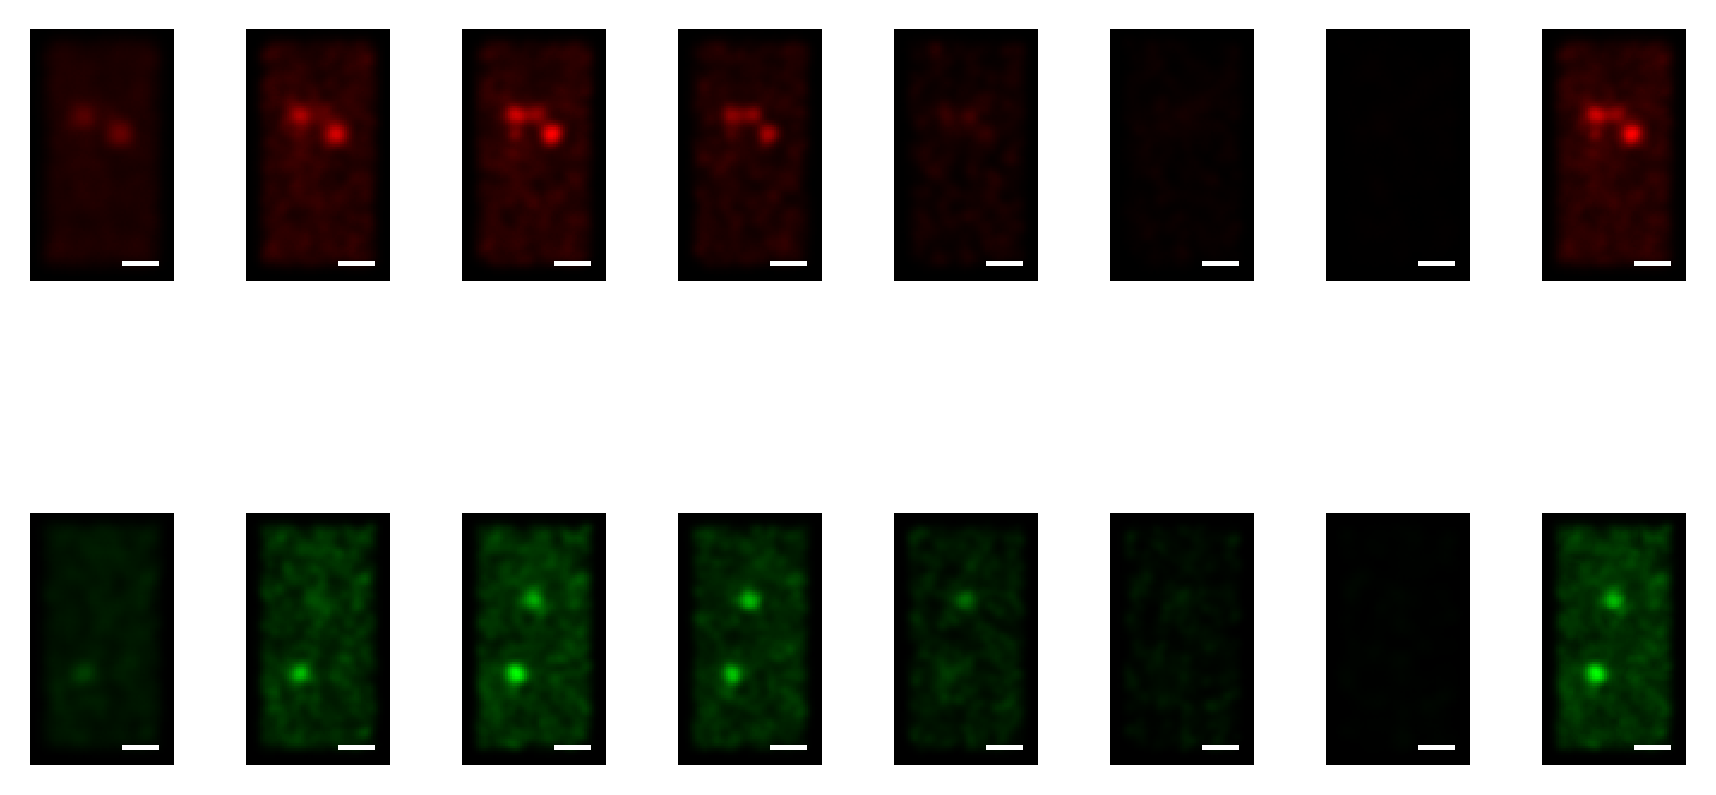

In [31]:
num_channels = z_frames.shape[1]
zstack_frames = z_frames.shape[0]
channel_colors = ['pure_red', 'pure_green']
channel_fluorophores = ['mCherry', 'EGFP']
fig, axes = plt.subplots(num_channels, zstack_frames + 1)
# normalization from the first frame
norm_frames_max = [np.max(z_frames[int(len(z_vals)/2.),i, 0,:]) for i in range(num_channels)]
norm_frames_min = [np.min(z_frames[int(len(z_vals)/2.),i, 0,:]) for i in range(num_channels)]
for i in range(num_channels):
    for j in range(zstack_frames):
        # axes[i, j].set_title(f'{z_vals[j]} um')
        axes[i, j].axis('off')
        axes[i, j].set_aspect('equal')
        microim = microshow(
            images=z_frames[j,i, 41:-44, 55:-75], fig_scaling=5,
            cmaps=channel_colors[i],limits = [100,max_lims[i]],rescale_type = 'limits',
            unit='um', scalebar_size_in_units=1, scalebar_unit_per_pix=0.065, scalebar_font_size=None, label_font_size=0.04, ax =  axes[i, j],
            )

        # axes[i, j].imshow(z_frames[j, i, 0][41:-44, 55:-75], cmap=channel_colors[i], vmin=0, vmax=2**16 - 1)
    axes[i, -1].axis('off')
    microim = microshow(
        images=np.max(z_frames[:,i, 41:-44, 55:-75], axis = 0), fig_scaling=5,
        cmaps=channel_colors[i],limits = [100,max_lims[i]],rescale_type = 'limits',
        unit='um', scalebar_size_in_units=1, scalebar_unit_per_pix=0.065, scalebar_font_size=None, label_font_size=0.04, ax =  axes[i, -1],
        )
    axes[i, 0].set_ylabel(f'Channel for {channel_fluorophores[i]}')
plt.tight_layout()
#plt.savefig('widefield_twocolor_high.svg', dpi=300)
plt.show()